In [2]:
#hist plots

In [33]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib notebook


In [73]:
#READ DATA
file_position="data/2016111141945_drivers.csv"

with open(file_position , "r") as file :
    content=file.read()
    print("succeed")
data=content.split("\n")
legend=data[0].split(",")
del data[0]
print(legend)

succeed
['id_num', 'Ox', 'Oy', 'Dx', 'Dy', 'departure_t', 'value_of_time', 'watching_repetition_time', 'matched', 'passenger', 'trip_vks', 'detour']


In [74]:
#DECIDE WHAT TO PLOT
X=[6]
fX=lambda x:x#,y: np.sqrt(x*x+y*y)
Y=8
Z=11
number_of_cut=50

<IPython.core.display.Javascript object>


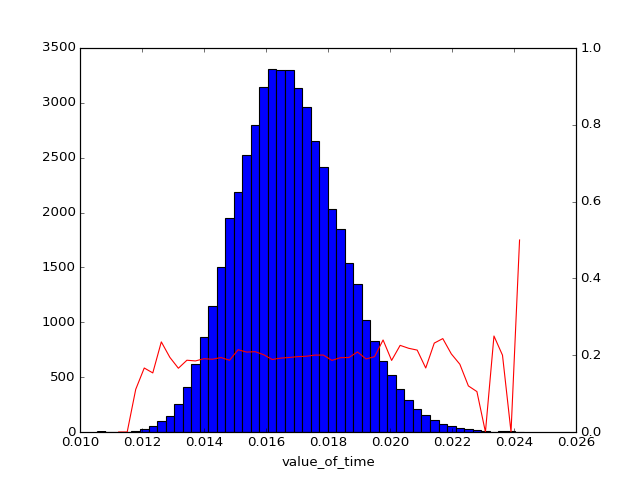

In [75]:
#PLOT

x,y=[],[]
for line in data:
    val=line.split(",")
    if len(val)>1:
        v=[]
        for Xi in X:
            v.append(float(val[Xi]))
        x.append(fX(*v))
        if val[Y] is '1':
            y.append(fX(*v))
        
fig = plt.figure()
ax = fig.add_subplot(111)
nx, bins,_ =ax.hist(x,number_of_cut)
ny,_=np.histogram(y,bins)
p=[y/x if x!=0 else None for x,y in zip(nx,ny)]
px=[(bins[i]+bins[i+1])/2 for i in range(len(bins)-1)]
ax.twinx().plot(px,p,color='r')
ax.set_xlabel(" ".join([legend[Xi] for Xi in X]))
plt.show()